# **Well Log Facies Dataset**


The data set we will use comes from a University of Kansas class exercise on the Hugoton and Panoma gas fields. For more on the origin of the data, see Dubois et al. (2007)


This exercise is based on a consortium project to use machine learning techniques to create a reservoir model of the largest gas fields in North America, the Hugoton and Panoma Fields.

The dataset we will use is log data from nine wells that have been labeled with a facies type based on oberservation of core. 

***What are the facies ..?***

Facies are studied from core samples in every half foot and matched with logging data in well location. Feature variables include five from wireline log measurements and two geologic constraining variables that are derived from geologic knowledge.

***Facies Classification***

Facies classification is one of the most important tasks that geoscientists work on development and exploration projects. Sedimentary facies reflect particular physical, chemical, and biological condition that unit experienced during sedimentation process. To study these facies, rock samples are required. 

In this study, We will use these log data to train supervised classifiers in order to predict discrete facies groups.


## **Business Value**

During oil and gas exploration techniques, coring is very expensive and highly desired to identify the log facies to characterize the reservoir. To perform this task can cost millions of dollars to the company, so determining the facies based upon machine learning can be very affective and cost cutting in oil and gas exploration.  For new discoveries, appraisal or develpment wells on well can have coring and all other field wells can be classified using this techique which can save '$MM' to the company.

In [ ]:
# First downloading the required directories 

%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable
from sklearn.model_selection import train_test_split, cross_val_score
import time
from IPython.display import Image
import pydotplus
import graphviz
import seaborn as sns
import math
import warnings
from sklearn import ensemble
from sklearn import tree

from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import precision_recall_curve, roc_curve
from sklearn.preprocessing import label_binarize

from sklearn.metrics import roc_curve, precision_recall_curve, roc_auc_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score, classification_report


In [ ]:
lfdata = pd.read_csv('data/facies_data.csv')

## Exploratoray Data Analysis

As we have to classifiy the facies based upon logs data so we will be handelling this as a'Classifier Problem' in terms of Machine learning / Supervised learning. The data set contains 5 wireline log measurements, two indicators and facies label in half foot interval.

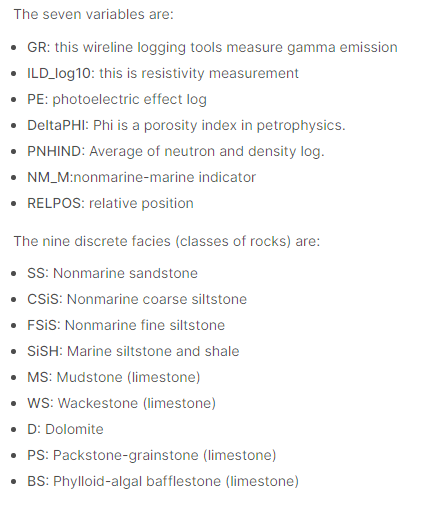

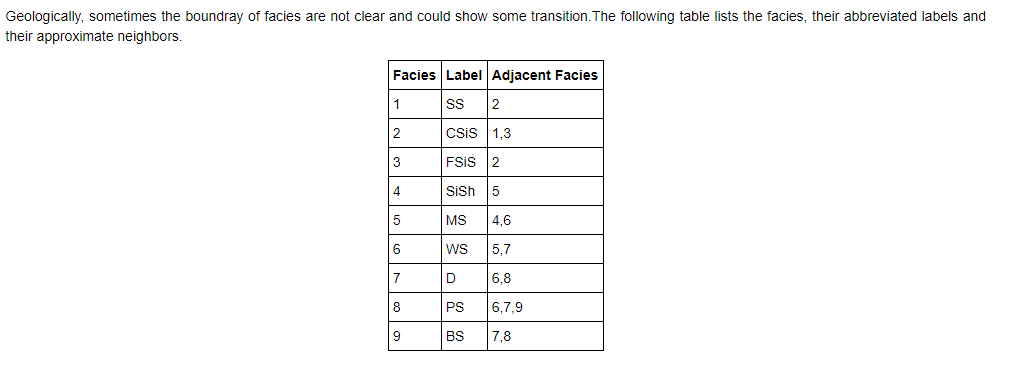

In [ ]:
lfdata.info()
lfdata.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3232 entries, 0 to 3231
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Facies     3232 non-null   int64  
 1   Formation  3232 non-null   object 
 2   Well Name  3232 non-null   object 
 3   Depth      3232 non-null   float64
 4   GR         3232 non-null   float64
 5   ILD_log10  3232 non-null   float64
 6   DeltaPHI   3232 non-null   float64
 7   PHIND      3232 non-null   float64
 8   PE         3232 non-null   float64
 9   NM_M       3232 non-null   int64  
 10  RELPOS     3232 non-null   float64
dtypes: float64(7), int64(2), object(2)
memory usage: 277.9+ KB


,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
0,3,A1 SH,SHRIMPLIN,2793.0,77.45,0.664,9.9,11.915,4.6,1,1.000
1,3,A1 SH,SHRIMPLIN,2793.5,78.26,0.661,14.2,12.565,4.1,1,0.979
2,3,A1 SH,SHRIMPLIN,2794.0,79.05,0.658,14.8,13.050,3.6,1,0.957
3,3,A1 SH,SHRIMPLIN,2794.5,86.10,0.655,13.9,13.115,3.5,1,0.936
4,3,A1 SH,SHRIMPLIN,2795.0,74.58,0.647,13.5,13.300,3.4,1,0.915
5,3,A1 SH,SHRIMPLIN,2795.5,73.97,0.636,14.0,13.385,3.6,1,0.894
6,3,A1 SH,SHRIMPLIN,2796.0,73.72,0.630,15.6,13.930,3.7,1,0.872
7,3,A1 SH,SHRIMPLIN,2796.5,75.65,0.625,16.5,13.920,3.5,1,0.830
8,3,A1 SH,SHRIMPLIN,2797.0,73.79,0.624,16.2,13.980,3.4,1,0.809
9,3,A1 SH,SHRIMPLIN,2797.5,76.89,0.615,16.9,14.220,3.5,1,0.787


In [ ]:
lfdata.nunique()

Facies          9
Formation      14
Well Name       8
Depth        1099
GR           2776
ILD_log10    1276
DeltaPHI     1055
PHIND        1949
PE            995
NM_M            2
RELPOS        825
dtype: int64

SS      259
CSiS    738
FSiS    615
SiSh    184
MS      217
WS      462
D        98
PS      498
BS      161
Name: Facies, dtype: int64

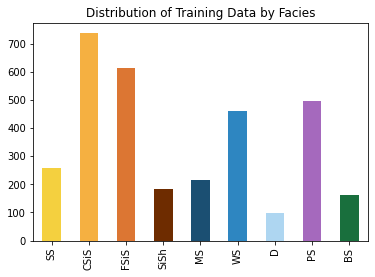

In [ ]:
# Displaying Facies  (with distinct counts)

facies_labels = ['SS', 'CSiS', 'FSiS', 'SiSh', 'MS', 'WS', 'D','PS', 'BS']
facies_colors = ['#F4D03F', '#F5B041','#DC7633','#6E2C00', '#1B4F72','#2E86C1', '#AED6F1', '#A569BD', '#196F3D']

facies_counts = lfdata['Facies'].value_counts().sort_index()

facies_counts.index = facies_labels

facies_counts.plot(kind='bar',color=facies_colors, 
                   title='Distribution of Training Data by Facies')
facies_counts

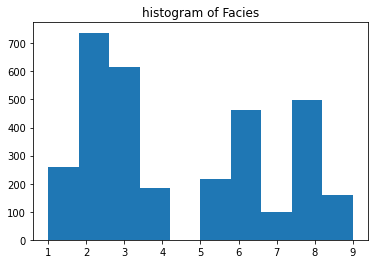

In [ ]:
plt.subplot(1, 1, 1)
plt.hist(lfdata['Facies'])
plt.title("histogram of Facies")

plt.show()

*Features selection/Importance with target variable (Facies)*

In [ ]:
lfdata.describe()

,Facies,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
count,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000
mean,4.422030,2875.824567,66.135769,0.642719,3.559642,13.483213,3.725014,1.498453,0.520287
std,2.504243,131.006274,30.854826,0.241845,5.228948,7.698980,0.896152,0.500075,0.286792
min,1.000000,2573.500000,13.250000,-0.025949,-21.832000,0.550000,0.200000,1.000000,0.010000
25%,2.000000,2791.000000,46.918750,0.492750,1.163750,8.346750,3.100000,1.000000,0.273000
50%,4.000000,2893.500000,65.721500,0.624437,3.500000,12.150000,3.551500,1.000000,0.526000
75%,6.000000,2980.000000,79.626250,0.812735,6.432500,16.453750,4.300000,2.000000,0.767250
max,9.000000,3122.500000,361.150000,1.480000,18.600000,84.400000,8.094000,2.000000,1.000000


*Correlating the features to see the max and min correlation with target variable.*

Text(0.5, 1.0, 'correlation matrix (Log Facies Data)')

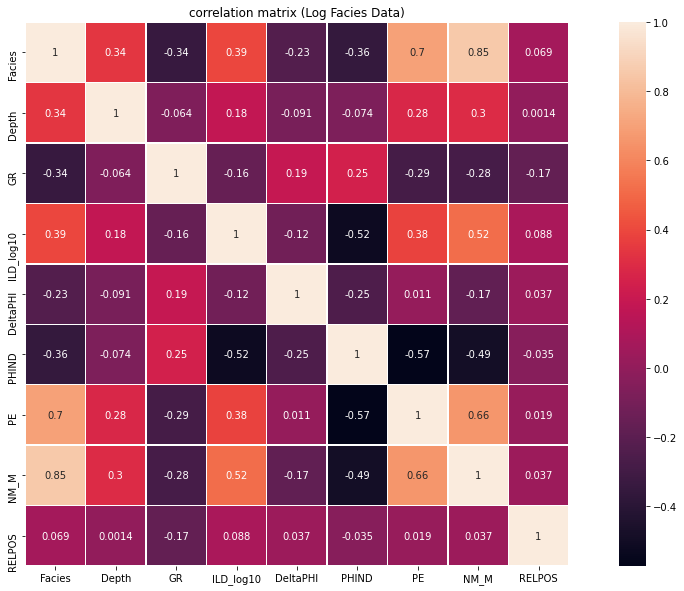

In [ ]:
# Make the correlation matrices
corrmat_lfdata = lfdata.corr()

# Heat maps are a great way to get 
# a quick visual read on a big correlation matrix.

plt.figure(figsize=(18,10))

# Draw the heat map using seaborn
sns.heatmap(corrmat_lfdata, square=True, annot=True, linewidths=.5)
plt.title("correlation matrix (Log Facies Data)")

Based upon the correlation results following features have higher correlation ['NM_M', 'PE', 'ILD_log10', 'Depth', 'RELPOS'] and following have lower correlation['PHIND', 'GR', 'DeltaPHI']  with target variable 'Facies'. 


**Well Name**, and **Formation** are other two features which are **categorical variables** and have no affect on out come, so we may dropp them as well. 



***Cross plotting / multivariate analysis from logs data***

we plot here 'Facies' as a result of cross plot of all logs data avaialbale to classify the target variable 'Facies'.

/usr/lib/python3.6/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The datapath rcparam was deprecated in Matplotlib 3.2.1 and will be removed two minor releases later.
  self[key] = other[key]
/usr/lib/python3.6/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/usr/lib/python3.6/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  self[key] = other[key]
/usr/lib/python3.6/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/usr/lib/python3.6/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]


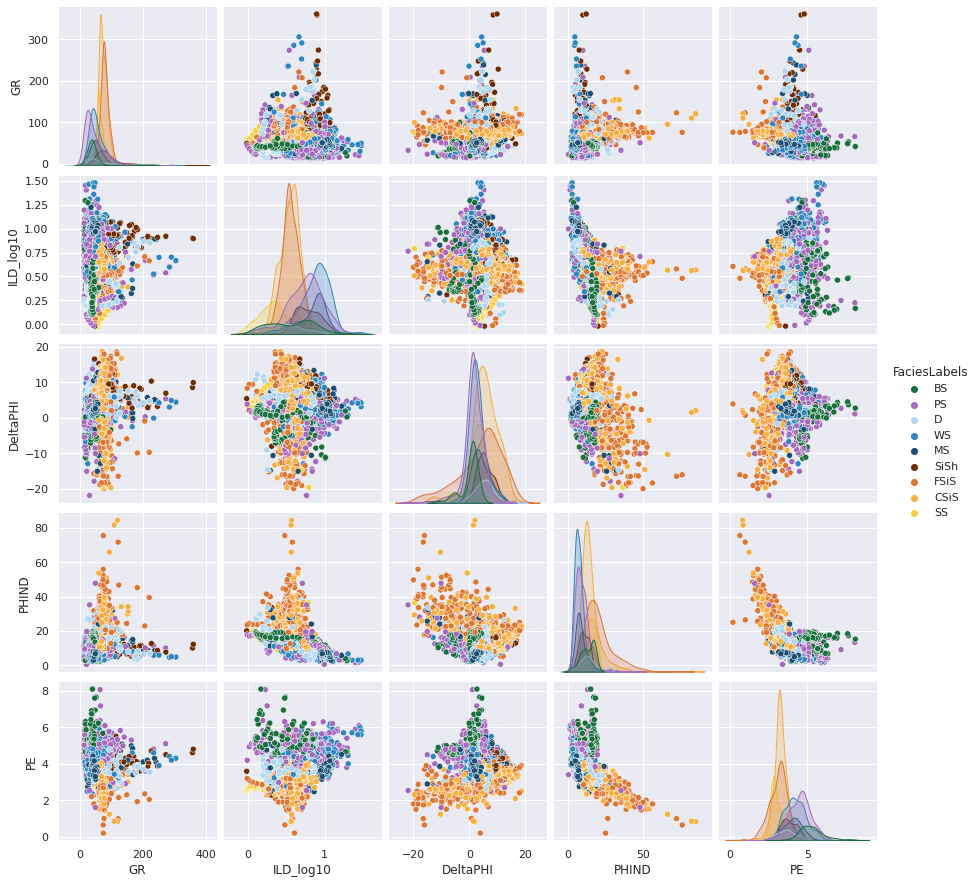

In [ ]:
sns.set()
inline_rc = dict(mpl.rcParams)

facies_colors = ['#F4D03F', '#F5B041','#DC7633','#6E2C00',
       '#1B4F72','#2E86C1', '#AED6F1', '#A569BD', '#196F3D']

facies_labels = ['SS', 'CSiS', 'FSiS', 'SiSh', 'MS',
                 'WS', 'D','PS', 'BS']

facies_color_map = {}
for ind, label in enumerate(facies_labels):
    facies_color_map[label] = facies_colors[ind]

def label_facies(row, labels):
    return labels[ row['Facies'] -1]

lfdata.loc[:,'FaciesLabels'] = lfdata.apply(lambda row: label_facies(row, facies_labels), axis=1)

sns.pairplot(lfdata.drop(['Well Name', 'Formation', 'Facies', 'Depth','NM_M','RELPOS'], axis=1), 
             hue='FaciesLabels', palette=facies_color_map, 
             hue_order=list(reversed(facies_labels)))
 
mpl.rcParams.update(inline_rc)

# **Testing Different Classifiers**

We'll execute different classifers with different datasets to see which gives us the best results and then we w'll tune/ that selected model to finalize our outcome.

In [ ]:
# Make a copy of the origional dataset to work on ..

lfdata_2 = lfdata.copy()

# Due to space in the name of 'Well Names' , we are changing it into a single name 'Wells'

lfdata_2.rename(columns = {'Well Name':'Wells'}, inplace = True)

lfdata_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3232 entries, 0 to 3231
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Facies     3232 non-null   int64  
 1   Formation  3232 non-null   object 
 2   Wells      3232 non-null   object 
 3   Depth      3232 non-null   float64
 4   GR         3232 non-null   float64
 5   ILD_log10  3232 non-null   float64
 6   DeltaPHI   3232 non-null   float64
 7   PHIND      3232 non-null   float64
 8   PE         3232 non-null   float64
 9   NM_M       3232 non-null   int64  
 10  RELPOS     3232 non-null   float64
dtypes: float64(7), int64(2), object(2)
memory usage: 277.9+ KB


## **Case 1. Dropping categorical variables, "Wells" and "Formation" in the dataset and running all classifiers.**

In [ ]:
lfdata_2.drop(['Wells'], axis=1, inplace=True)
lfdata_2.drop(['Formation'], axis=1, inplace=True)
lfdata_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3232 entries, 0 to 3231
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Facies     3232 non-null   int64  
 1   Depth      3232 non-null   float64
 2   GR         3232 non-null   float64
 3   ILD_log10  3232 non-null   float64
 4   DeltaPHI   3232 non-null   float64
 5   PHIND      3232 non-null   float64
 6   PE         3232 non-null   float64
 7   NM_M       3232 non-null   int64  
 8   RELPOS     3232 non-null   float64
dtypes: float64(7), int64(2)
memory usage: 227.4 KB


### **Linear Regression**

In [ ]:
import warnings
warnings.filterwarnings("ignore")

X = lfdata_2.drop(['Facies'], axis = 1)
y = lfdata_2['Facies']

# We use startify to select a balanced amount of each facies, as Facies distribution is imbalanced.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=lfdata_2['Facies'])

# Applying Logistic Regression

lr = LogisticRegression(solver = 'lbfgs', max_iter=1000)
lr.fit(X_train, y_train)

lr_score = lr.score(X_test, y_test)
lr_predictions = lr.predict(X_test)

print('Accuracy of Logistic Regression: {:.3f}'.format(lr_score))

Accuracy of Logistic Regression: 0.451


### **Support Vector Machine (SVM) Classifier**

In [ ]:
svm = LinearSVC(max_iter=1000)
svm.fit(X_train, y_train)
svm_score = svm.score(X_test, y_test)
svm_predictions = svm.predict(X_test)

print('Accuracy of SVM: {:.3f}'.format(svm_score))

Accuracy of SVM: 0.335


### **KNN- Classifier**

In [ ]:
knn = KNeighborsClassifier(n_neighbors=7)

# Then  fit the model
knn.fit(X_train, y_train)

# How well did we do
knn_7_score = knn.score(X_test, y_test)
knn_7_predictions = knn.predict(X_test)

print('Accuracy of KNN (k = 7): {:.3f}'.format(knn_7_score))

Accuracy of KNN (k = 7): 0.662


In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)

# Then  fit the model
knn.fit(X_train, y_train)

# How well did we do
knn_5_score = knn.score(X_test, y_test)
knn_5_predictions = knn.predict(X_test)

print('Accuracy of KNN (k = 5): {:.3f}'.format(knn_5_score))

Accuracy of KNN (k = 5): 0.665


### **Decision Tree**

In [ ]:
dt = DecisionTreeClassifier()

dt.fit(X_train,y_train)

dt_score = dt.score(X_test, y_test)
dt_predictions = dt.predict(X_test)
print('Accuracy of Decision Tree: {:.3f} '.format(dt_score))

Accuracy of Decision Tree: 0.689 


### **Random Forest**

In [ ]:
rf = RandomForestClassifier(n_estimators = 22, random_state = 40)

rf.fit(X_train,y_train)

rf_score = rf.score(X_test, y_test)
rf_predictions = rf.predict(X_test)

print('Accuracy of Random Forest: {:.3f}'.format(rf_score))

Accuracy of Random Forest: 0.768


### **Gradient Boosting**

In [ ]:
params = {'n_estimators': 500,
          'max_depth': 2,
          'loss': 'deviance'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

clf_score = clf.score(X_test, y_test)
clf_predictions = clf.predict(X_test)

print('Accuracy of Gradient Boosting: {:.3f}'.format(clf_score))

Accuracy of Gradient Boosting: 0.764


### **comparing predictions and selecting best model**

In [ ]:
predictions_dictionary = {'Logistic Regression' : lr_predictions, 'KNN_7' : knn_7_predictions, 
                          'KNN_5': knn_5_predictions, 'SVM' : svm_predictions, 'Decision Tree' : dt_predictions, 
                          'Random Forest' : rf_predictions, 'Gradient Boosting' : clf_predictions, 'Actual': y_test}

predictions_df = pd.DataFrame(predictions_dictionary)
predictions_df

,Logistic Regression,KNN_7,KNN_5,SVM,Decision Tree,Random Forest,Gradient Boosting,Actual
1731,3,3,3,2,5,7,8,5
2791,8,6,6,6,6,6,6,6
39,3,3,3,2,3,3,3,3
854,2,8,8,2,8,8,8,8
2336,8,9,9,2,9,9,9,9
...,...,...,...,...,...,...,...,...
2708,8,9,9,2,9,9,9,9
1297,2,2,2,2,2,2,2,2
1919,2,2,2,2,2,2,2,2
3157,2,3,9,2,7,6,6,7


## **Case 2. Converting categorical variables, "Wells" and "Formation" in dummies dataset and running all classifiers.**

In [ ]:
# Reloading the dataset

lfdata = pd.read_csv('/content/drive/My Drive/Supervised Learning - Capstone 2 Project/facies_data.csv')

In [ ]:
lfdata_2 = lfdata.copy()
lfdata_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3232 entries, 0 to 3231
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Facies     3232 non-null   int64  
 1   Formation  3232 non-null   object 
 2   Well Name  3232 non-null   object 
 3   Depth      3232 non-null   float64
 4   GR         3232 non-null   float64
 5   ILD_log10  3232 non-null   float64
 6   DeltaPHI   3232 non-null   float64
 7   PHIND      3232 non-null   float64
 8   PE         3232 non-null   float64
 9   NM_M       3232 non-null   int64  
 10  RELPOS     3232 non-null   float64
dtypes: float64(7), int64(2), object(2)
memory usage: 277.9+ KB


In [ ]:
lfdata_2.rename(columns = {'Well Name':'Wells'}, inplace = True)

lfdata_2 = pd.concat([lfdata_2, pd.get_dummies(lfdata_2['Wells'], drop_first=True)], axis = 1)
lfdata_2 = pd.concat([lfdata_2, pd.get_dummies(lfdata_2['Formation'], drop_first=True)], axis = 1)
lfdata_2.drop(['Wells'], axis=1, inplace=True)
lfdata_2.drop(['Formation'], axis=1, inplace=True)

In [ ]:
lfdata_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3232 entries, 0 to 3231
Data columns (total 29 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Facies          3232 non-null   int64  
 1   Depth           3232 non-null   float64
 2   GR              3232 non-null   float64
 3   ILD_log10       3232 non-null   float64
 4   DeltaPHI        3232 non-null   float64
 5   PHIND           3232 non-null   float64
 6   PE              3232 non-null   float64
 7   NM_M            3232 non-null   int64  
 8   RELPOS          3232 non-null   float64
 9   CROSS H CATTLE  3232 non-null   uint8  
 10  LUKE G U        3232 non-null   uint8  
 11  NEWBY           3232 non-null   uint8  
 12  NOLAN           3232 non-null   uint8  
 13  Recruit F9      3232 non-null   uint8  
 14  SHANKLE         3232 non-null   uint8  
 15  SHRIMPLIN       3232 non-null   uint8  
 16  A1 SH           3232 non-null   uint8  
 17  B1 LM           3232 non-null   u

### **Linear Regression**


In [ ]:
import warnings
warnings.filterwarnings("ignore")

X = lfdata_2.drop(['Facies'], axis = 1)
y = lfdata_2['Facies']

# We use startify to select a balanced amount of each facies, as Facies distribution is imbalanced.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=lfdata_2['Facies'])

# Applying Logistic Regression

lr = LogisticRegression(solver = 'lbfgs', max_iter=1000)
lr.fit(X_train, y_train)

lr_score = lr.score(X_test, y_test)
lr_predictions = lr.predict(X_test)

print('Accuracy of Logistic Regression: {:.3f}'.format(lr_score))

Accuracy of Logistic Regression: 0.485


### **Support Vector Machine (SVM) Classifier**

In [ ]:
svm = LinearSVC(max_iter=1000)
svm.fit(X_train, y_train)
svm_score = svm.score(X_test, y_test)
svm_predictions = svm.predict(X_test)

print('Accuracy of SVM: {:.3f}'.format(svm_score))

Accuracy of SVM: 0.301


### **KNN- Classifier**

In [ ]:
knn = KNeighborsClassifier(n_neighbors=7)

# Then  fit the model
knn.fit(X_train, y_train)

# How well did we do
knn_7_score = knn.score(X_test, y_test)
knn_7_predictions = knn.predict(X_test)

print('Accuracy of KNN (k = 7): {:.3f}'.format(knn_7_score))

Accuracy of KNN (k = 7): 0.668


In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)

# Then  fit the model
knn.fit(X_train, y_train)

# How well did we do
knn_5_score = knn.score(X_test, y_test)
knn_5_predictions = knn.predict(X_test)

print('Accuracy of KNN (k = 5): {:.3f}'.format(knn_5_score))

Accuracy of KNN (k = 5): 0.666


### **Decision Tree**

In [ ]:
dt = DecisionTreeClassifier()

dt.fit(X_train,y_train)

dt_score = dt.score(X_test, y_test)
dt_predictions = dt.predict(X_test)
print('Accuracy of Decision Tree: {:.3f} '.format(dt_score))

Accuracy of Decision Tree: 0.739 


### **Random Forest**

In [ ]:
rf = RandomForestClassifier(n_estimators = 22, random_state = 40)

rf.fit(X_train,y_train)

rf_score = rf.score(X_test, y_test)
rf_predictions = rf.predict(X_test)

print('Accuracy of Random Forest: {:.3f}'.format(rf_score))

Accuracy of Random Forest: 0.827


### **Gradient Boosting**

In [ ]:
params = {'n_estimators': 500,
          'max_depth': 2,
          'loss': 'deviance'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

clf_score = clf.score(X_test, y_test)
clf_predictions = clf.predict(X_test)

print('Accuracy of Gradient Boosting: {:.3f}'.format(clf_score))

Accuracy of Gradient Boosting: 0.807


### **comparing predictions and selecting best model**

In [ ]:
predictions_dictionary = {'Logistic Regression' : lr_predictions, 'KNN_7' : knn_7_predictions, 
                          'KNN_5': knn_5_predictions, 'SVM' : svm_predictions, 'Decision Tree' : dt_predictions, 
                          'Random Forest' : rf_predictions, 'Gradient Boosting' : clf_predictions, 'Actual': y_test}

predictions_df = pd.DataFrame(predictions_dictionary)
predictions_df

,Logistic Regression,KNN_7,KNN_5,SVM,Decision Tree,Random Forest,Gradient Boosting,Actual
1731,3,3,3,3,5,5,8,5
2791,6,6,6,6,6,6,6,6
39,2,3,3,3,3,3,3,3
854,2,8,8,6,8,8,8,8
2336,8,9,9,6,9,9,9,9
...,...,...,...,...,...,...,...,...
2708,8,9,9,3,9,9,9,9
1297,2,2,2,3,2,2,2,2
1919,2,2,2,3,2,2,2,2
3157,2,3,9,6,7,6,7,7


## **Case 3. Balancing the Dataset based upon- 'Facies' and running all classifiers.**

In [ ]:
# Reloading the dataset

lfdata = pd.read_csv('/content/drive/My Drive/Supervised Learning - Capstone 2 Project/facies_data.csv')

In [ ]:
lfdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3232 entries, 0 to 3231
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Facies     3232 non-null   int64  
 1   Formation  3232 non-null   object 
 2   Well Name  3232 non-null   object 
 3   Depth      3232 non-null   float64
 4   GR         3232 non-null   float64
 5   ILD_log10  3232 non-null   float64
 6   DeltaPHI   3232 non-null   float64
 7   PHIND      3232 non-null   float64
 8   PE         3232 non-null   float64
 9   NM_M       3232 non-null   int64  
 10  RELPOS     3232 non-null   float64
dtypes: float64(7), int64(2), object(2)
memory usage: 277.9+ KB


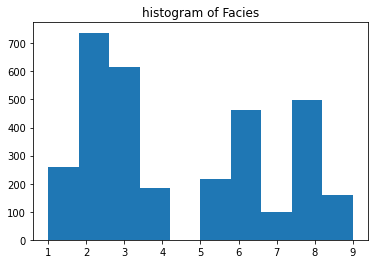

In [ ]:
# Facies distribution shows imbalanced data.
plt.subplot(1, 1, 1)
plt.hist(lfdata['Facies'])
plt.title("histogram of Facies")

plt.show()

Hence the lowest number of Facies has '98' samples so ww will extract 98 samples from each facies balancing the data set for all outcomes and re run the classifiers.

In [ ]:
lfdata3 = lfdata.copy()


#df1 = df.loc[df['Column_Name'] == 1]
#sl_f1 = df1.sample(n=98, random_state=1)

df1 = lfdata3.loc[lfdata3['Facies'] == 1]
df2 = lfdata3.loc[lfdata3['Facies'] == 2]
df3 = lfdata3.loc[lfdata3['Facies'] == 3]
df4 = lfdata3.loc[lfdata3['Facies'] == 4]
df5 = lfdata3.loc[lfdata3['Facies'] == 5]
df6 = lfdata3.loc[lfdata3['Facies'] == 6]
df7 = lfdata3.loc[lfdata3['Facies'] == 7]
df8 = lfdata3.loc[lfdata3['Facies'] == 8]
df9 = lfdata3.loc[lfdata3['Facies'] == 9]

# now defining these datasets

slf1 = df1.sample(n=98, random_state=1)
slf2 = df2.sample(n=98, random_state=1)
slf3 = df3.sample(n=98, random_state=1)
slf4 = df4.sample(n=98, random_state=1)
slf5 = df5.sample(n=98, random_state=1)
slf6 = df6.sample(n=98, random_state=1)
slf7 = df7.sample(n=98, random_state=1)
slf8 = df8.sample(n=98, random_state=1)
slf9 = df9.sample(n=98, random_state=1)

# summing them into one dataframe

new_df = pd.concat([slf1, slf2, slf3, slf4, slf5, slf6, slf7, slf8, slf9])

In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 882 entries, 1643 to 2308
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Facies     882 non-null    int64  
 1   Formation  882 non-null    object 
 2   Well Name  882 non-null    object 
 3   Depth      882 non-null    float64
 4   GR         882 non-null    float64
 5   ILD_log10  882 non-null    float64
 6   DeltaPHI   882 non-null    float64
 7   PHIND      882 non-null    float64
 8   PE         882 non-null    float64
 9   NM_M       882 non-null    int64  
 10  RELPOS     882 non-null    float64
dtypes: float64(7), int64(2), object(2)
memory usage: 82.7+ KB


In [ ]:
new_df.rename(columns = {'Well Name':'Wells'}, inplace = True)

new_df.drop(['Wells'], axis=1, inplace=True)
new_df.drop(['Formation'], axis=1, inplace=True)
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 882 entries, 1643 to 2308
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Facies     882 non-null    int64  
 1   Depth      882 non-null    float64
 2   GR         882 non-null    float64
 3   ILD_log10  882 non-null    float64
 4   DeltaPHI   882 non-null    float64
 5   PHIND      882 non-null    float64
 6   PE         882 non-null    float64
 7   NM_M       882 non-null    int64  
 8   RELPOS     882 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 68.9 KB


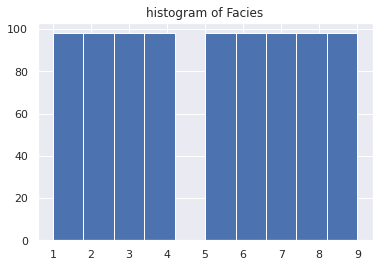

In [ ]:
plt.subplot(1, 1, 1)
plt.hist(new_df['Facies'])
plt.title("histogram of Facies")

plt.show()

In [ ]:
X = new_df.drop(['Facies'], axis = 1)
y = new_df['Facies']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=new_df['Facies'])

### **Linear Regression**


In [ ]:
lr = LogisticRegression(solver = 'lbfgs', max_iter=1000)

lr.fit(X_train, y_train)

lr_score = lr.score(X_test, y_test)
lr_predictions = lr.predict(X_test)

print('Accuracy of Logistic Regression: {:.3f}'.format(lr_score))

Accuracy of Logistic Regression: 0.415


### **Support Vector Machine**

In [ ]:
svm = LinearSVC(max_iter=1000)
svm.fit(X_train, y_train)
svm_score = svm.score(X_test, y_test)
svm_predictions = svm.predict(X_test)

print('Accuracy of SVM: {:.3f}'.format(svm_score))

Accuracy of SVM: 0.298


### **KNN- Classifier**

In [ ]:
knn = KNeighborsClassifier(n_neighbors=7)

# Then  fit the model
knn.fit(X_train, y_train)

# How well did we do
knn_7_score = knn.score(X_test, y_test)
knn_7_predictions = knn.predict(X_test)

print('Accuracy of KNN (k = 7): {:.3f}'.format(knn_7_score))

Accuracy of KNN (k = 7): 0.483


In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)

# Then  fit the model
knn.fit(X_train, y_train)

# How well did we do
knn_5_score = knn.score(X_test, y_test)
knn_5_predictions = knn.predict(X_test)

print('Accuracy of KNN (k = 5): {:.3f}'.format(knn_5_score))

Accuracy of KNN (k = 5): 0.494


### **Decision Tree**

In [ ]:
dt = DecisionTreeClassifier()

dt.fit(X_train,y_train)

dt_score = dt.score(X_test, y_test)
dt_predictions = dt.predict(X_test)
print('Accuracy of Decision Tree: {:.3f} '.format(dt_score))

Accuracy of Decision Tree: 0.642 


### **Random Forest**

In [ ]:
rf = RandomForestClassifier(n_estimators = 22, random_state = 40)

rf.fit(X_train,y_train)

rf_score = rf.score(X_test, y_test)
rf_predictions = rf.predict(X_test)

print('Accuracy of Random Forest: {:.3f}'.format(rf_score))

Accuracy of Random Forest: 0.649


### **Gradient Boosting**

In [ ]:
params = {'n_estimators': 500,
          'max_depth': 2,
          'loss': 'deviance'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

clf_score = clf.score(X_test, y_test)
clf_predictions = clf.predict(X_test)

print('Accuracy of Gradient Boosting: {:.3f}'.format(clf_score))

Accuracy of Gradient Boosting: 0.657


### **comparing predictions and selecting best model**

In [ ]:
predictions_dictionary = {'Logistic Regression' : lr_predictions, 'KNN_7' : knn_7_predictions, 
                          'KNN_5': knn_5_predictions, 'SVM' : svm_predictions, 'Decision Tree' : dt_predictions, 
                          'Random Forest' : rf_predictions, 'Gradient Boosting' : clf_predictions, 'Actual': y_test}

predictions_df = pd.DataFrame(predictions_dictionary)
predictions_df

,Logistic Regression,KNN_7,KNN_5,SVM,Decision Tree,Random Forest,Gradient Boosting,Actual
1618,2,1,1,4,3,2,4,1
965,2,2,2,4,1,2,2,2
1952,8,2,3,4,8,8,8,8
3147,6,7,7,4,7,9,9,7
1427,3,1,1,3,1,1,1,1
...,...,...,...,...,...,...,...,...
1593,5,2,2,4,1,1,2,1
3080,9,5,5,9,8,9,8,8
3007,9,9,9,9,8,5,8,5
338,3,3,3,3,3,3,3,3


### **Concluding Features selection and finalizing the model..**

Based upon all tested classifiers, Random Forest and Gradient Boosting are two sho best results. We can Tune further their parameters and finalized the one is better to move forward.

***3. Model your outcome of interest. ***

Dropping categorical variables **"Wells"** and **'Formation'** and **'NM_M'** and **'RELPOS'** which arer indicators and may baised the results.

In [ ]:
# Make a copy of the origional dataset to work on ..

lfdata_2 = lfdata.copy()

# Due to space in the name of 'Well Names' , we are changing it into a single name 'Wells'

lfdata_2.rename(columns = {'Well Name':'Wells'}, inplace = True)

# Dropping categorical variables " Wells " and 'Formation' and 'NM_M' and 'RELPOS' which arer indicators and may baised the results

lfdata_2.drop(['Wells', 'Formation', 'NM_M', 'RELPOS'], axis=1, inplace=True)


X = lfdata_2.drop(['Facies'], axis = 1)
y = lfdata_2['Facies']

# We use startify to select a balanced amount of each facies, as Facies distribution is imbalanced.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=lfdata_2['Facies'])

lfdata_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3232 entries, 0 to 3231
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Facies     3232 non-null   int64  
 1   Depth      3232 non-null   float64
 2   GR         3232 non-null   float64
 3   ILD_log10  3232 non-null   float64
 4   DeltaPHI   3232 non-null   float64
 5   PHIND      3232 non-null   float64
 6   PE         3232 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 176.9 KB


## **Tunning  Parameters for Random Forest  & Gradient Boosting Models**

**Random Forest & Cross Validation**

In [ ]:
rf = RandomForestClassifier(n_estimators = 100, random_state = 42)

rf.fit(X_train,y_train)

rf_score = rf.score(X_test, y_test)
rf_predictions = rf.predict(X_test)

print('Accuracy of Random Forest: {:.3f}'.format(rf_score))

Accuracy of Random Forest: 0.743


In [ ]:
# Cross Validation cv = 10

rf_clf = RandomForestClassifier(n_estimators = 100, random_state = 42)
rf_cv_scores = cross_val_score(rf_clf, X_train, y_train, cv = 10)

print('Accuracy scores for the 5 folds: ', rf_cv_scores)
print('Mean cross validation score: {:.3f}'.format(np.mean(rf_cv_scores)))

Accuracy scores for the 5 folds:  [0.71814672 0.69111969 0.76833977 0.72586873 0.72200772 0.76744186
 0.77131783 0.72868217 0.74418605 0.71317829]
Mean cross validation score: 0.735


**Gradient Boosting & Cross Validation**

In [ ]:
clf = ensemble.GradientBoostingClassifier(n_estimators =100, random_state = 42)

clf.fit(X_train, y_train)

clf_score = clf.score(X_test, y_test)
clf_predictions = clf.predict(X_test)

print('Accuracy of Gradient Boosting: {:.3f}'.format(clf_score))

Accuracy of Gradient Boosting: 0.737


In [ ]:
# Cross Validation cv = 10

clf = ensemble.GradientBoostingClassifier(n_estimators =100, random_state = 42)
clf_cv_scores = cross_val_score(clf, X_train, y_train, cv = 10)

print('Accuracy scores for the 5 folds: ', clf_cv_scores)
print('Mean cross validation score: {:.3f}'.format(np.mean(clf_cv_scores)))

Accuracy scores for the 5 folds:  [0.7027027  0.68725869 0.74517375 0.68725869 0.68725869 0.73255814
 0.73643411 0.71317829 0.68217054 0.65116279]
Mean cross validation score: 0.703


**Changing parameters of classifier**


**Random Forest**

In [ ]:
# Random Forest 

dt_start_time = time.time()
rf = RandomForestClassifier(n_estimators = 750, random_state = 64, max_depth=9, min_samples_split =2, min_samples_leaf =1)

rf.fit(X_train,y_train)

rf_score = rf.score(X_test, y_test)
rf_predictions = rf.predict(X_test)

print('Accuracy of Random Forest: {:.3f}'.format(rf_score))
print('Random Forest runtime: {}'.format(time.time() - dt_start_time))

Accuracy of Random Forest: 0.702
Random Forest runtime: 3.791867971420288


In [ ]:
# Cross Validation cv = 10

rf = RandomForestClassifier(n_estimators = 750, random_state = 64, max_depth=9, min_samples_split =2, min_samples_leaf =1)
rf_cv_scores = cross_val_score(rf_clf, X_train, y_train, cv = 10)

print('Accuracy scores for the 5 folds: ', rf_cv_scores)
print('Mean cross validation score: {:.3f}'.format(np.mean(rf_cv_scores)))

Accuracy scores for the 5 folds:  [0.71814672 0.69111969 0.76833977 0.72586873 0.72200772 0.76744186
 0.77131783 0.72868217 0.74418605 0.71317829]
Mean cross validation score: 0.735


**Gradient Boosting**

In [ ]:
clf = ensemble.GradientBoostingClassifier(n_estimators = 750, random_state = 64, max_depth=9, min_samples_split =2, min_samples_leaf =1)

# Initialize and fit the model.
# clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

clf_score = clf.score(X_test, y_test)
clf_predictions = clf.predict(X_test)

print('Accuracy of Gradient Boosting: {:.3f}'.format(clf_score))

Accuracy of Gradient Boosting: 0.781


In [ ]:
# Cross Validation with cv = 10

clf = ensemble.GradientBoostingClassifier(n_estimators = 750, random_state = 64, max_depth=9, min_samples_split =2, min_samples_leaf =1)

clf_cv_scores = cross_val_score(clf, X_train, y_train, cv = 10)

print('Accuracy scores for the 10 folds: ', clf_cv_scores)
print('Mean cross validatiion score: {:.3f}'.format(np.mean(clf_cv_scores)))

Accuracy scores for the 10 folds:  [0.71428571 0.69111969 0.78764479 0.76061776 0.76447876 0.77131783
 0.79069767 0.7248062  0.75968992 0.70542636]
Mean cross validatiion score: 0.747


**Grid Search for RF Model Params**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [100, 300, 500, 800, 1200]
max_features = ['auto', 'sqrt']
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10] 
bootstrap = [True, False]

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores

random_grid= {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, 
                               cv=3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model

rf_random.fit(X_train, y_train)

rf_random_score = rf_random.score(X_test, y_test)

rf_random_predictions = rf_random.predict(X_test)


print('Accuracy of RandomForest Random: {:.3f}'.format(rf_random_score))
print('Random Forest Random runtime: {}'.format(time.time() - dt_start_time))

print(rf_random.best_score_)
print(rf_random.best_params_)
print(rf_random.best_estimator_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  9.3min finished


Accuracy of RandomForest Random: 0.762
Random Forest Random runtime: 1568.8206708431244
0.7067713849163683
{'n_estimators': 800, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 25, 'bootstrap': False}
RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=25, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=800,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


**Grid Search for Gradiant Boosting Model Params**

In [ ]:
n_estimators = [100, 300, 500, 800, 1200]
max_features = ['auto', 'sqrt']
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10] 


# Use the random grid to search for best hyperparameters
# First create the base model to tune
clf = ensemble.GradientBoostingClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores

random_grid= {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
               
clf_random = RandomizedSearchCV(estimator = clf, param_distributions = random_grid, n_iter = 100, 
                               cv=3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model

clf_random.fit(X_train, y_train)

clf_random_score = clf_random.score(X_test, y_test)

clf_random_predictions = clf_random.predict(X_test)


print('Accuracy of RandomForest Random: {:.3f}'.format(clf_random_score))
print('Random Forest Random runtime: {}'.format(time.time() - dt_start_time))

print(clf_random.best_score_)
print(clf_random.best_params_)
print(clf_random.best_estimator_)


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 29.4min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 57.1min finished


Accuracy of RandomForest Random: 0.774
Random Forest Random runtime: 5307.839938163757
0.7350065976629273
{'n_estimators': 800, 'min_samples_split': 10, 'min_samples_leaf': 10, 'max_features': 'auto', 'max_depth': 5}
GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=5,
                           max_features='auto', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=10, min_samples_split=10,
                           min_weight_fraction_leaf=0.0, n_estimators=800,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


## **Concluding Model Selection**

Based uon the acuracy score using discreate and grid search parameters for both Random Forest (mean score 70) and Gradiant Boostin (mean score 74), I decided to move with Gradient Boosting as final choice.

Gradient Boosting is prone to overfitting however we can further tune parameters and make sure that its not overfitted.

### **Performing Confusion MAtrix using Gradiant Boosting**

In [ ]:
# Re loading the dataset

lfdata = pd.read_csv('/content/drive/My Drive/Supervised Learning - Capstone 2 Project/facies_data.csv')

# Make a copy of the origional dataset to work on ..
lfdata_2 = lfdata.copy()

# Due to space in the name of 'Well Names' , we are changing it into a single name 'Wells'
lfdata_2.rename(columns = {'Well Name':'Wells'}, inplace = True)

# Dropping categorical variables " Wells " and 'Formation' and 'NM_M' and 'RELPOS' which arer indicators and may baised the results
lfdata_2.drop(['Wells', 'Formation', 'NM_M', 'RELPOS'], axis=1, inplace=True)


X = lfdata_2.drop(['Facies'], axis = 1)
y = lfdata_2['Facies']

# We use startify to select a balanced amount of each facies, as Facies distribution is imbalanced.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=lfdata_2['Facies'])
lfdata_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3232 entries, 0 to 3231
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Facies     3232 non-null   int64  
 1   Depth      3232 non-null   float64
 2   GR         3232 non-null   float64
 3   ILD_log10  3232 non-null   float64
 4   DeltaPHI   3232 non-null   float64
 5   PHIND      3232 non-null   float64
 6   PE         3232 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 176.9 KB


In [ ]:
# Executing Confusion MAtrix

def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('Predicted label')
    plt.xlabel('True label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

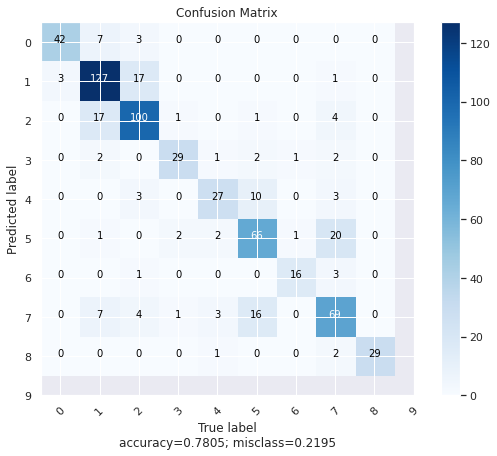

In [ ]:
# Initialize and fit the model.

clf = ensemble.GradientBoostingClassifier(n_estimators = 750, random_state = 64, max_depth=9, min_samples_split =2, min_samples_leaf =1)

clf.fit(X_train, y_train)
clf_score = clf.score(X_test, y_test)
clf_predictions = clf.predict(X_test)

confusion = confusion_matrix(y_test, clf.predict(X_test))
plot_confusion_matrix(cm=confusion, target_names=[i for i in range(10)], title = 'Confusion Matrix', normalize=False)

The enteries along diagonal are the facies which are correctly classified. Acuracy is defined as the number of correct classification divided by total number of classifications.

Here GB model shows the Acuracy of about 78%.



**Accuracy**

In [ ]:
clf.score(X_test, y_test)


0.7805255023183926

**Precision**

In [ ]:
y_pred = clf.predict(X_test)
precision_score(y_test,y_pred, average='macro')

0.8248217782680137

**Recall**


In [ ]:
recall_score(y_test,y_pred, average='macro')

0.7782378456397235

**Interpreting the Matrix**

In [ ]:
predictions = clf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions, average='macro')
recall = recall_score(y_test, predictions, average='macro')
f1 = f1_score(y_test, predictions, average='macro')
fbeta_precision = fbeta_score(y_test, predictions, 0.5, average='macro')
fbeta_recall = fbeta_score(y_test, predictions, 2, average='macro')

print('Accuracy score: {:.2f}'.format(accuracy))
print('Precision score: {:.2f}'.format(precision))
print('Recall score: {:.2f}'.format(recall))
print('F1 score: {:.2f}'.format(f1))
print('Fbeta score favoring precision: {:.2f}'.format(fbeta_precision))
print('FBeta score favoring recall: {:.2f}'.format(fbeta_recall))

Accuracy score: 0.78
Precision score: 0.82
Recall score: 0.78
F1 score: 0.80
Fbeta score favoring precision: 0.81
FBeta score favoring recall: 0.79


### **Classification Report**

In [ ]:
report = classification_report(y_test, predictions, target_names=['SS - 1', 'CSIS - 2','FSIS - 3', 'SISH - 4', 'MS - 5', 'WS = 6', 'D - 7', 'PS - 8', 'BS - 9'])
print(report)

              precision    recall  f1-score   support

      SS - 1       0.93      0.81      0.87        52
    CSIS - 2       0.79      0.86      0.82       148
    FSIS - 3       0.78      0.81      0.80       123
    SISH - 4       0.88      0.78      0.83        37
      MS - 5       0.79      0.63      0.70        43
      WS = 6       0.69      0.72      0.71        92
       D - 7       0.89      0.80      0.84        20
      PS - 8       0.66      0.69      0.68       100
      BS - 9       1.00      0.91      0.95        32

    accuracy                           0.78       647
   macro avg       0.82      0.78      0.80       647
weighted avg       0.79      0.78      0.78       647



Classification report shows that Facies 'PS', 'MS' and 'WS' shows relatively lower F1 score comparing to other facies.

**Features Importance**

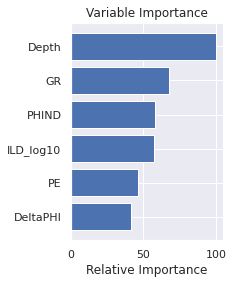

In [ ]:
feature_importance = clf.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

### **Decision Function - Varying probablity threshold & ROC Curve**


In [ ]:
lfdata_2 = lfdata.copy()
lfdata_2.rename(columns = {'Well Name':'Wells'}, inplace = True)

lfdata_2.drop(['Wells'], axis=1, inplace=True)
lfdata_2.drop(['Formation'], axis=1, inplace=True)

lfdata_2.drop(['NM_M'], axis=1, inplace=True)
lfdata_2.drop(['RELPOS'], axis=1, inplace=True)


X = lfdata_2.drop(['Facies'], axis = 1)
y = lfdata_2['Facies']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=lfdata_2['Facies'])

clf = GradientBoostingClassifier()
clf.fit(X_train, y_train)

probs = clf.predict_proba(X_test)[:, 1]
print(probs[1:30])

[2.94099142e-03 2.10594985e-01 8.49447917e-03 4.33674621e-05
 8.16833704e-01 4.99768745e-02 3.03414515e-03 5.38106645e-01
 2.98073785e-02 2.69915055e-02 1.77044841e-01 9.14419665e-03
 3.31237910e-01 7.77609652e-03 5.61746692e-02 5.87159295e-01
 5.01092090e-01 1.28759374e-01 7.63148323e-02 6.45952160e-02
 1.06335073e-02 6.63986211e-01 8.94560011e-01 8.59791244e-01
 5.50574905e-03 4.29220580e-03 2.66729579e-01 5.20546275e-03
 3.40943086e-01]


These numbers reflect the probability of prediction, showing mix range up to 80% of prediction which is not that bad.

### **Displaying Probability Threshold**

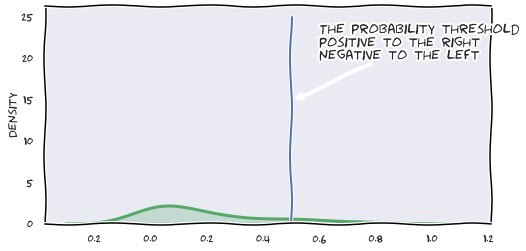

In [ ]:
pos = [i for i, j in zip(probs, y_test) if j == 1]
neg = [i for i, j in zip(probs, y_test) if j == 0]

with plt.xkcd():
  fig = plt.figure(figsize=(8, 4))

  sns.distplot(pos, hist = False, kde = True, color='g',
                 kde_kws = {'shade': True, 'linewidth': 3})

  sns.distplot(neg, hist = False, kde = True, color='r',
                 kde_kws = {'shade': True, 'linewidth': 3})

  plt.plot([0.5, 0.5], [0, 25], '-b')
  plt.annotate(
        'The probability threshold\npositive to the right\nnegative to the left',
        xy=(0.51, 15), arrowprops=dict(arrowstyle='->'), xytext=(0.6, 20))

plt.show()

### **Precision Recal & ROC Curves**

In [ ]:
# Make a copy of the origional dataset to work on ..
lfdata_2 = lfdata.copy()

# Due to space in the name of 'Well Names' , we are changing it into a single name 'Wells'
lfdata_2.rename(columns = {'Well Name':'Wells'}, inplace = True)

# Dropping categorical variables " Wells " and 'Formation' and 'NM_M' and 'RELPOS' which arer indicators and may baised the results
lfdata_2.drop(['Wells', 'Formation', 'NM_M', 'RELPOS'], axis=1, inplace=True)


X = lfdata_2.drop(['Facies'], axis = 1)
y = lfdata_2['Facies']

n_classes = len(set(lfdata_2['Facies']))
Y = label_binarize(y, classes=[*range(n_classes)])

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    Y,
                                                    random_state = 42)

clf = OneVsRestClassifier(RandomForestClassifier(n_estimators=50,
                             max_depth=3,
                             random_state=0))
clf.fit(X_train, y_train)

y_score = clf.predict_proba(X_test)


 **Precision - Recall Curve**

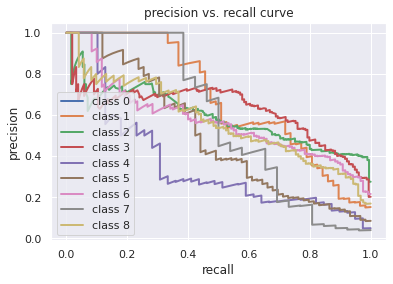

In [ ]:
# precision recall curve
precision = dict()
recall = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:, i],
                                                        y_score[:, i])
    plt.plot(recall[i], precision[i], lw=2, label='class {}'.format(i))
    
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.show()

Curve exhibits the precision and recall range from 60 to 90% of the Facies classes.

**ROC-Curve**

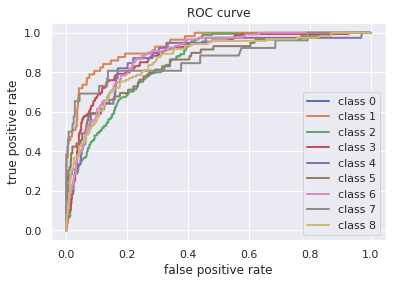

In [ ]:
# roc curve
fpr = dict()
tpr = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i],
                                  y_score[:, i])
    plt.plot(fpr[i], tpr[i], lw=2, label='class {}'.format(i))

plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.legend(loc="best")
plt.title("ROC curve")
plt.show()

# **Results:**




*   The overall classifier (Gradiant Boosting) shows an overall good results in facies classification. 
Accuracy metrics for the test data set. Precision and recall are metrics that tell us how the classifier is performing for individual facies. Precision is the probability that, given a classification result for a sample, the sample actually belongs to that class. Recall is the probability that a sample will be correctly classified for a given class. For example, if the classifier predicts that an interval is fine siltstone (FSiS), there is a 62% probability that the interval is actually sandstone (precision). If an interval is actually fine siltstone, there is a 54% probability that it will be correctly classified (recall). The F1 score combines both accuracy and precision to give a single measure of relevancy of the classifier results.


*    The classifier (GB) achieved an over result of 80% which is not bad but still shows there is a room to improve.


*   Results show that the lithofacies log vs actuall facies log are pretty close.



*   This exercise provided a brief overview of a typical machine learning workflow: preparing a data set, training a classifier, and evaluating the model, which will providepowerful algorithm that can be applied to problems in Geoscience.




